In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statistics as stats


In [21]:
def get_data():
    df = pd.read_csv("data/BP_Data.csv")
    # Rename columns
    df.rename(columns={
        'SYS(mmHg)': 'SYS',
        'DIA(mmHg)': 'DIA',
        'Pulse(Beats/Min)': 'HR',
        'Date': 'Date'
    }, inplace=True)
    df['state'] = df['Note'].apply(lambda x: 'Sitting' if 'Sitting' in str(x) else 'Standing' if 'Standing' in str(x) else 'Unknown')
    df = df[df['state'].isin(['Sitting', 'Standing'])]
    return df

In [22]:
df = get_data()

In [5]:
# Create a categorical sitting/standing column based on 'Note'
df['state'] = df['Note'].apply(lambda x: 'Sitting' if 'Sitting' in str(x) else 'Standing' if 'Standing' in str(x) else 'Unknown')

In [17]:
# Get the average of SYS, DIA, and HR for Sitting versus Standing
def get_average_by_state(df):
    # Filter out the 'Unknown' state
    df = df[df['state'].isin(['Sitting', 'Standing'])]
    # Group by 'state' and calculate the averages
    averages = df.groupby('state').agg({
        'SYS': ['mean', 'std', 'median', 'min', 'max'],
        'DIA': ['mean', 'std', 'median', 'min', 'max'],
        'HR': ['mean', 'std', 'median', 'min', 'max']
    }).reset_index()
    return averages

In [18]:
get_average_by_state(df)

state         SYS                                   DIA            \
                   mean        std median min  max       mean       std   
0   Sitting  107.740741   7.517122  106.0  98  128  71.518519  4.948740   
1  Standing  106.384615  10.932802  104.0  89  133  77.230769  8.348929   

                          HR                             
  median min  max       mean        std median min  max  
0   71.0  63   81  67.037037   6.009489   65.0  60   83  
1   76.0  64  106  99.346154  12.493013   98.0  78  119

In [10]:
summary_df = df.groupby('state').describe()

In [19]:
# Create a bar graph showing the mean, min and max from the summary data
def plot_summary(summary_df):
    # Plotting the summary statistics
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
    
    summary_df['HR'].plot(kind='bar', ax=axes[0], title='Heart Rate (HR) Summary')
    summary_df['SYS'].plot(kind='bar', ax=axes[1], title='Systolic Blood Pressure (SYS) Summary')
    summary_df['DIA'].plot(kind='bar', ax=axes[2], title='Diastolic Blood Pressure (DIA) Summary')
    
    plt.tight_layout()
    plt.show()

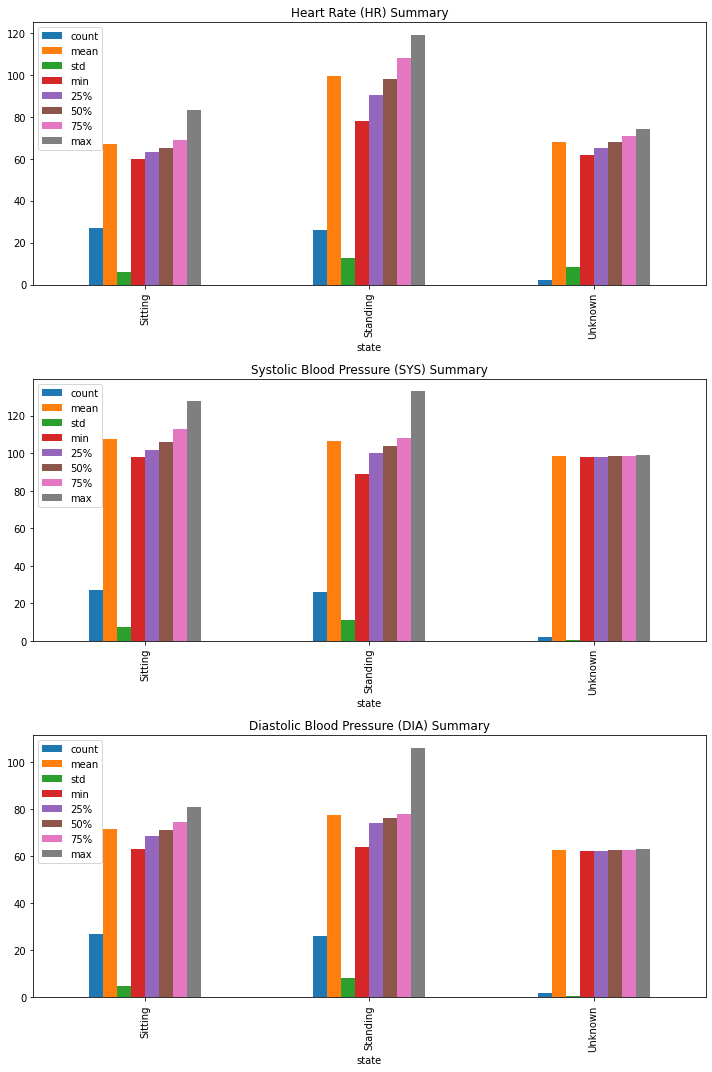

In [20]:
plot_summary(summary_df)

In [7]:
get_average_by_state(df)

,state,SYS,DIA,HR
0,Sitting,107.740741,71.518519,67.037037
1,Standing,106.384615,77.230769,99.346154
2,Unknown,98.500000,62.500000,68.000000


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [40]:
# Prepare data
X = df[['HR', 'SYS', "DIA"]]  # Features: Heart Rate
y = df['state'] # Target: Sitting/Standing

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

In [43]:
# classification report for logistic regression
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Print classification report
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.91
              precision    recall  f1-score   support

     Sitting       0.86      1.00      0.92         6
    Standing       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

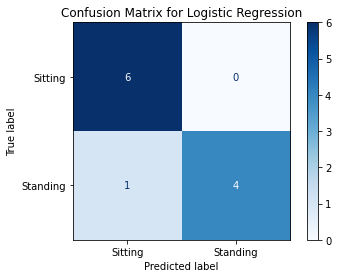

In [44]:
#visualize logistic regression
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")

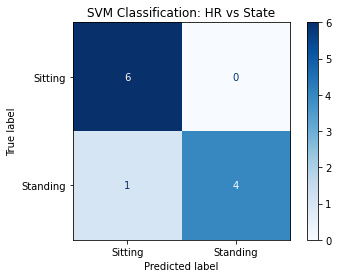

In [30]:
# Predict and visualize
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Classification: HR vs State")
plt.show()

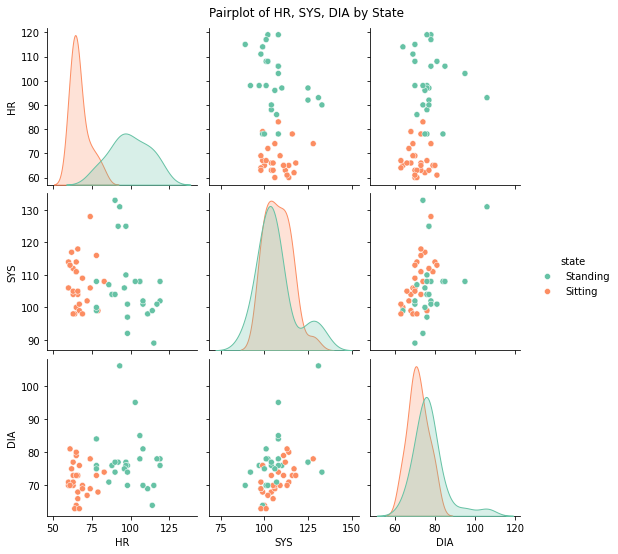

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot/scatterplot matrix for HR, SYS, DIA colored by state
sns.pairplot(df, vars=['HR', 'SYS', 'DIA'], hue='state', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot of HR, SYS, DIA by State", y=1.02)
plt.show()

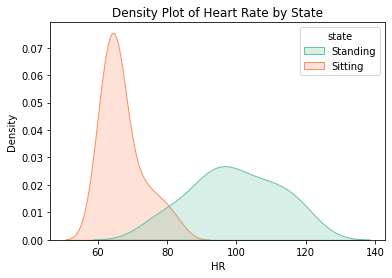

In [39]:
#make density plot of HR, SYS, DIA by state
sns.kdeplot(data=df, x='HR', hue='state', fill=True, common_norm=False, palette='Set2')
plt.title("Density Plot of Heart Rate by State")
plt.show()